# Research on the Zuber, a new ride-sharing company 

Zuber is a new ride-sharing company that's launching in Chicago. Here we will find patterns in order to understand passenger preferences and the impact of external factors on rides. We will use a database, analyze data from competitors, and test a hypothesis about the impact of weather on ride frequency.

### Step 1. Openning the data file and studying the general information. 

In [1]:
import pandas as pd
import numpy as np 
import math as mt
from math import factorial
from scipy.stats import norm
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats as st
from collections import Counter

In [2]:
#Let’s read them from the csv and check what we have there.
#1st table from the csv file will be saved as table1:

table1 = pd.read_csv('/datasets/project_sql_result_01.csv', sep=',')
table1.info()
display(table1.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
company_name    64 non-null object
trips_amount    64 non-null int64
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


,company_name,trips_amount
0,Flash Cab,19558
1,Taxi Affiliation Services,11422
2,Medallion Leasing,10367
3,Yellow Cab,9888
4,Taxi Affiliation Service Yellow,9299


In [3]:
#2nd table from the csv file will be saved as table2:

table2 = pd.read_csv('/datasets/project_sql_result_04.csv', sep=',')
table2.info()
display(table2.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
dropoff_location_name    94 non-null object
average_trips            94 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000


In [4]:
#3rd table from the csv file will be saved as table3:

table3 = pd.read_csv('/datasets/project_sql_result_07.csv', sep=',')
table3.info()
display(table3.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
start_ts              1068 non-null object
weather_conditions    1068 non-null object
duration_seconds      1068 non-null float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [5]:
table1.describe()


,trips_amount
count,64.000000
mean,2145.484375
std,3812.310186
min,2.000000
25%,20.750000
50%,178.500000
75%,2106.500000
max,19558.000000


In [6]:
table2.describe()

,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [7]:
table3.describe()

,duration_seconds
count,1068.000000
mean,2071.731273
std,769.461125
min,0.000000
25%,1438.250000
50%,1980.000000
75%,2580.000000
max,7440.000000


### Conclusion


There are 2 data sets. Every data set is saved as a variable:

**table1**

Its total length is 64 rows, every row represents one company and its characteristics in columns: 
company_name: taxi company name; 
trips_amount: the number of rides for each taxi company on November 15-16, 2017.




**table2**

Its total length is 94 rows, every row represents one Chicago neighborhood and its characteristics in columns: 
dropoff_location_name: Chicago neighborhoods where rides ended;
average_trips: the average number of rides that ended in each neighborhood in November 2017.

**table3**

Its total length is 1068 rows, every row represents one ride from the Loop to O'Hare International Airport and its characteristics in columns: 
start_ts - pickup date and time; 
weather_conditions - weather conditions at the moment the ride started;
duration_seconds - ride duration in seconds.
    
As part of out analysis, we took a look the data info, we found that average_trips data and start_ts are saved as float and trip_amount saved as integer, company_name, dropoff_location_name, start_ts and weather_conditions are saved as string.

### Step 2. Analyze the data : Exploratory data analysis

In [8]:
#let's identify the top 10 neighborhoods in terms of drop-offs:

display(table2.head(10))

,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


In [9]:
#let's make graph: taxi companies and number of rides

# first let's select top 20 companies for the graph to present most relevant data for the research
df1 = table1.nlargest(20, 'trips_amount')

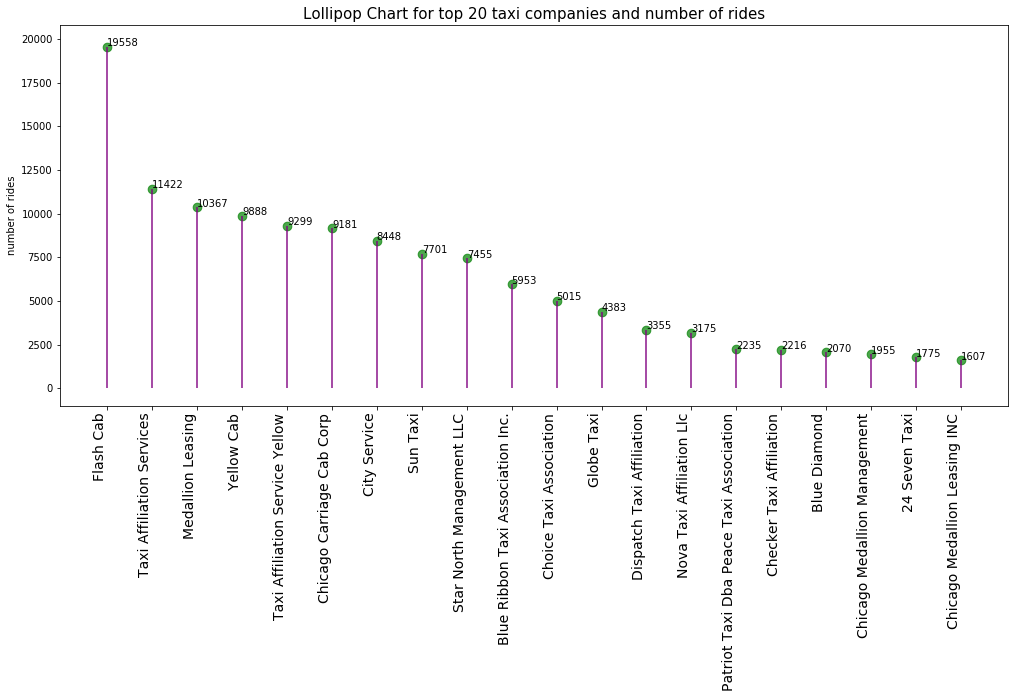

In [10]:
df = df1[['company_name','trips_amount']]

fig,ax=plt.subplots(figsize=(17,7))
ax.vlines(x=df.company_name, ymin=0, ymax=df.trips_amount, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=df.company_name, y=df.trips_amount, s=75, color='green', alpha=0.7)

ax.set_title('Lollipop Chart for top 20 taxi companies and number of rides', fontdict={'size':15})
ax.set_ylabel('number of rides')
ax.set_xticks(df.company_name)
ax.set_xticklabels(df.company_name, rotation=90, fontdict={'horizontalalignment':'right','size':14})

for row in df.itertuples():
    ax.text(row.company_name, row.trips_amount+30, s=round(row.trips_amount, 2))

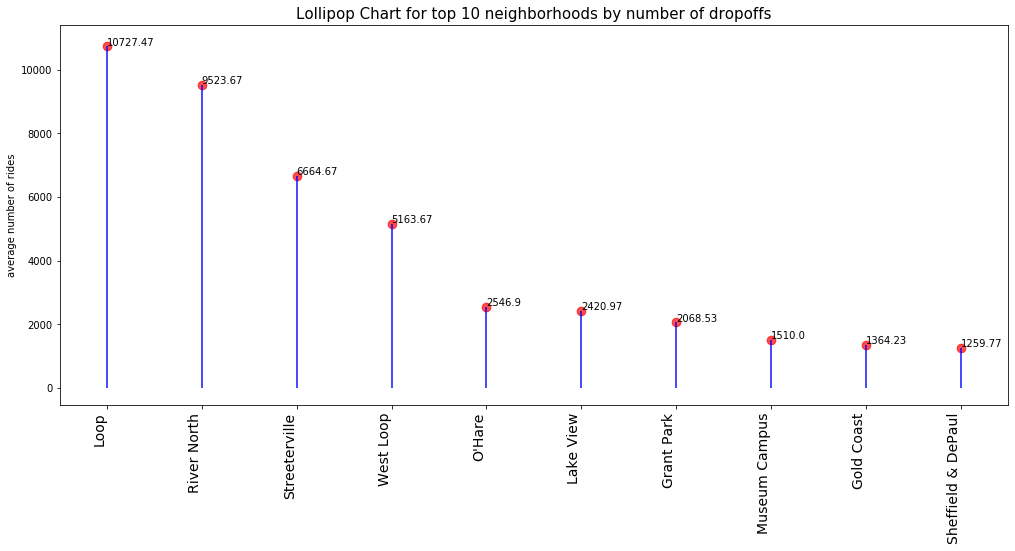

In [11]:
#let's make graph: top 10 neighborhoods by number of dropoffs

#first let's select top 10 neighborhoods by number of dropoffs
df2 = table2.nlargest(10, 'average_trips')

df = df2[['dropoff_location_name','average_trips']]

fig,ax=plt.subplots(figsize=(17,7))
ax.vlines(x=df.dropoff_location_name, ymin=0, ymax=df.average_trips, color='blue', alpha=0.7, linewidth=2)
ax.scatter(x=df.dropoff_location_name, y=df.average_trips, s=75, color='red', alpha=0.7)

ax.set_title('Lollipop Chart for top 10 neighborhoods by number of dropoffs', fontdict={'size':15})
ax.set_ylabel('average number of rides')
ax.set_xticks(df.dropoff_location_name)
ax.set_xticklabels(df.dropoff_location_name, rotation=90, fontdict={'horizontalalignment':'right','size':14})

for row in df.itertuples():
    ax.text(row.dropoff_location_name, row.average_trips+30, s=round(row.average_trips, 2))

### Conclusion


While analysing the data, we saw 64 taxi companies, and in average they have 2145 rides, with minimum 2, maxinmum 19558 and median of 178 rides. Checking more precisely top 20, we saw that the winner is Flash Cab with 19558 rides, Taxi Affiliation Services with 11422, and Medallion Leasing with 10367 with rides.

Then, checking 94 drop off locations we saw that the average number of trips is minimum 1.8 and maximum 10727 with the median of 52 trips. Thus, while checking in details top 10 locations, we saw  Loop with 10727, River North with 9524 rides and Streeterville with 6665 average rides.


### Step 3. Analyze the data : Testing hypotheses 

In [12]:
#In this part we'll test the hypothesis:
#"The average duration of rides from Loop neighborhood to O'Hare International Airport changes on rainy Saturdays."

#we'll explain:
#how was formed the null and alternative hypotheses
#what criterion were used to test the hypotheses and why


In [13]:
#So now we can test the hypothesis whether the average duration of rides from Loop neighborhood 
#to O'Hare International Airport changes on rainy Saturdays
#let's check sample sizes: 

print('The size of the not rainy day sample is:', (len(table3.query('weather_conditions == "Good"'))))
print('The size of the rainy day sample is:', (len(table3.query('weather_conditions == "Bad"'))))

The size of the not rainy day sample is: 888
The size of the rainy day sample is: 180


In [14]:
rainy_sat = table3.query('weather_conditions == "Bad"')['duration_seconds']
notRainy_sat = table3.query('weather_conditions == "Good"')['duration_seconds']

In [15]:
#We'll use ttest method to determine if the means of two sets of data are significantly different from each other 
#note: we calculate the t-test on two independent samples, thus using ttest_ind and not ttest_rel

print(
'The average duration of rides from Loop neighborhood to OHare International Airport are the same regardless of rain:'
)
#The alpha value to use will be 0.5 as 5% significance 

alpha = 0.05

results = st.ttest_ind(
    rainy_sat, 
    notRainy_sat)
print()
print('p-value calls:', results.pvalue)
# compare the p-value to the statistical significance):
if (results.pvalue < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")
print()


The average duration of rides from Loop neighborhood to OHare International Airport are the same regardless of rain:

p-value calls: 6.517970327099473e-12
We reject the null hypothesis



### Conclusion


Testing null hypotheses:
Our groups samples are different, thus we used ttest_ind method (and not ttest_rel for two relative groups of the similar size). If we reject the null hypotheses - means both samples are vrey different to each other taking into account signifficance limit (5% in our case). If we should reject the null hypotheses, means our groups are very different from each other. 

We performed following tests:
Whether the average duration of rides from Loop neighborhood to O'Hare International Airport are the same regardless of rain.

As a result, we found that average duration of ride is very different on rainy Saturday and in a good weather, taking into account the limit of significance of 5%.
